# Phase 4 Project: Skin Condition Classification
## Technical Analysis Notebook
### Authored by Trinity Gahagen
---
---

This notebook and the modeling notebook both work with the Skin Condition image dataset found on this [Kaggle page](https://www.kaggle.com/datasets/syedalinaqvi/augmented-skin-conditions-image-dataset).

# Table of Contents
- [Executive Summary](#executive-summary)

- [Basic Imports and Brief Dataset Overview](#basic-imports-and-brief-dataset-overview)

    - [Dataset Overview](#dataset-overview)

- [EDA: Descriptive Analysis](#eda-descriptive-analysis)

    - [Question 1 - How many images in each category?](#how-many-images-are-in-each-category-of-skin-conditions)

    - [Question 2 - What is the average RGB channel intensity for each category?](#what-is-the-average-rgb-channel-intensity-for-each-class)

    - [Question 3 - How do the average blue channel intensities vary?](#how-do-the-average-blue-channel-intensities-vary-across-categories)

    - [Question 4 - How do the average green channel intensities vary?](#how-do-the-average-green-channel-intensities-vary-across-categories)

    - [Question 5 - How do the average red channel intensities vary?](#how-do-the-average-red-channel-intensities-vary-across-categories)

    - [Question 6 - What are the image resolutions in each category?](#what-are-the-image-resolutions-in-each-category)

- [Results](#results)

- [External Resources](#external-resources)

<a id="executive-summary"></a>
# Executive Summary
---
In this notebook, an exploratory data analysis is conducted on an image dataset containing pictures of different skin conditions. Several descriptive questions pertaining to the image' composition (RGB channels, resolutions, number of images in each class) are asked and answered.

Since this dataset is not tabular in nature, it would not be the best use of time to conduct an inferential analysis on the images, since it would not yield information pertinent to the modeling approaches in the modeling notebook.

<a id="basic-imports-and-brief-dataset-overview"></a>
# Basic Imports and Brief Dataset Overview
---

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import PIL
from glob import glob
import cv2

# Plotting tools
import colorcet as cc
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
# Look at the structure of the data directory
DIRECTORY = "../Skin_Conditions/"
for path in os.walk(DIRECTORY):
    print(path[0])

../Skin_Conditions/
../Skin_Conditions/Acne
../Skin_Conditions/Carcinoma
../Skin_Conditions/Eczema
../Skin_Conditions/Keratosis
../Skin_Conditions/Milia
../Skin_Conditions/Rosacea


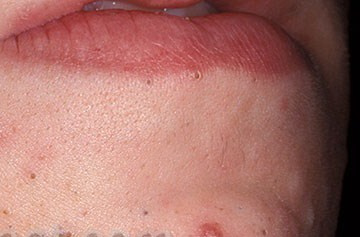

In [3]:
# Show an example image
acne_images = list(glob("../Skin_Conditions/Acne/*"))
PIL.Image.open(str(acne_images[0]))

This dataset consists of many images of the following skin conditions:
- Acne
- Carcinoma
- Eczema
- Keratosis
- Milia
- Rosacea

To get a better feel of our data, we will perform an exploratory data analysis on the images in the dataset.

<a id="eda-descriptive-analysis"></a>
# EDA: Descriptive Analysis
---

<a id=#how-many-images-are-in-each-category-of-skin-conditions></a>
## How many images are in each category of skin conditions?

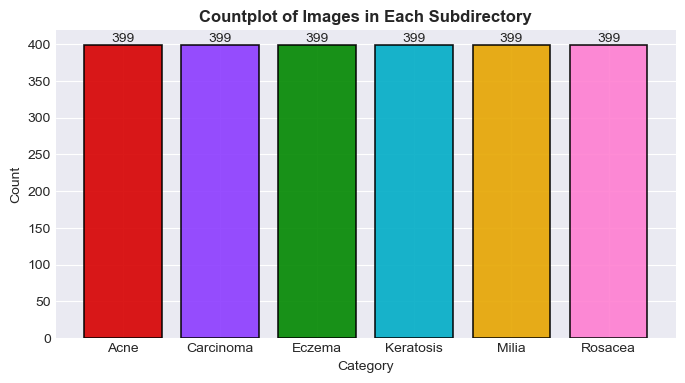

In [4]:
# Get a list of the subdirectories
subdirectories = [os.path.join(DIRECTORY, d) for d in os.listdir(DIRECTORY) if os.path.isdir(os.path.join(DIRECTORY, d))]

# Loop through subdirectories and collect counts of images in each one
counts = []
for n, subdir in enumerate(subdirectories):
    counts.append(len(os.listdir(subdir)))


# Plot
subdir_labels = [d for d in os.listdir(DIRECTORY)]

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(subdir_labels, counts, lw=1.2, edgecolor='black', color=cc.glasbey_dark, alpha=0.9)
for index, n in enumerate(counts):
    ax.annotate(n,
                xy=(index, n + 0.02 * ax.get_ylim()[1]),
                va='center',
                ha='center'
                )

ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Countplot of Images in Each Subdirectory', weight='bold');

There are 399 images in each category, making this dataset perfectly balanced!

<a id="what-is-the-average-rgb-channel-intensity-for-each-class"></a>
## What is the average RGB channel intensity for each class?

In [5]:
def calculate_rgb_channels(subdirectory):
    """
    Calculates the average blue, green, and red channels for all images in a specified subdirectory
    Returns the averages in 1D numpy arrays
    """
    image_list = os.listdir(subdirectory)
    
    avg_blues = []
    avg_greens = []
    avg_reds = []
    for name in image_list:
        image = cv2.imread(subdirectory + "/" + name)
        avg_blues.append(np.mean(image[:, :, 0])) # In the cv2 module, blue is first
        avg_greens.append(np.mean(image[:, :, 1]))
        avg_reds.append(np.mean(image[:, :, 2]))
    
    return avg_blues, avg_greens, avg_reds


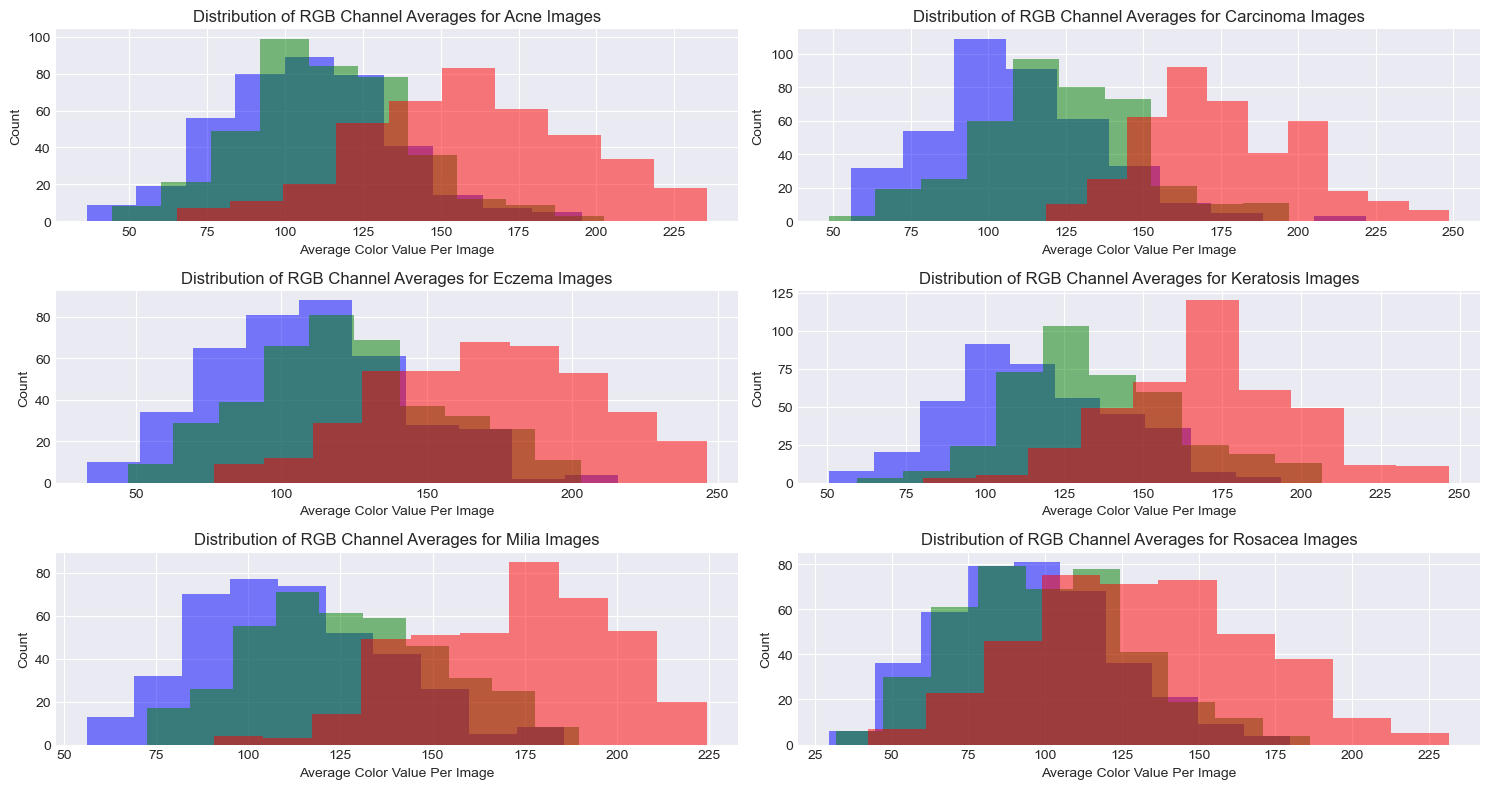

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(15, 8))
for n, subdir in enumerate(subdirectories):
    ax = axes[n // 2, n % 2]
    blues, greens, reds = calculate_rgb_channels(subdir)

    ax.hist(blues, color='blue', alpha=0.5)
    ax.hist(greens, color='green', alpha=0.5)
    ax.hist(reds, color='red', alpha=0.5)
    ax.set_xlabel('Average Color Value Per Image')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of RGB Channel Averages for {subdir_labels[n]} Images')
plt.tight_layout();

<a id="how-do-the-average-blue-channel-intensities-vary-across-categories"></a>
## How do the average blue channel intensities vary across categories?

In [7]:
# Refresher on the different subdirectories
subdirectories

['../Skin_Conditions/Acne',
 '../Skin_Conditions/Carcinoma',
 '../Skin_Conditions/Eczema',
 '../Skin_Conditions/Keratosis',
 '../Skin_Conditions/Milia',
 '../Skin_Conditions/Rosacea']

In [8]:
# Obtain the blue, green, and red channels for each category
acne_b, acne_g, acne_r = calculate_rgb_channels(DIRECTORY + "Acne")
carcinoma_b, carcinoma_g, carcinoma_r = calculate_rgb_channels(DIRECTORY + "Carcinoma")
eczema_b, eczema_g, eczema_r = calculate_rgb_channels(DIRECTORY + "Eczema")
keratosis_b, keratosis_g, keratosis_r = calculate_rgb_channels(DIRECTORY + "Keratosis")
milia_b, milia_g, milia_r = calculate_rgb_channels(DIRECTORY + "Milia")
rosacea_b, rosacea_g, rosacea_r = calculate_rgb_channels(DIRECTORY + "Rosacea")

In [9]:
def plot_channel_intensity_barplot(*channel_lists, color=''):
    """
    Creates a bar plot of the average color channel intensity per image, per category
    Returns nothing
    """
    if color == "Blue":
        cmap = plt.get_cmap('Blues_r')
    elif color == "Red":
        cmap = plt.get_cmap('Reds_r')
    elif color == "Green":
        cmap = plt.get_cmap('Greens_r')

    colors = cmap(np.linspace(0, 1, 10))

    channel_averages = [np.mean(channel_list) for channel_list in channel_lists]

    fig, ax = plt.subplots(figsize=(8, 3))

    ax.bar(subdir_labels, channel_averages, lw=1.2, edgecolor='black', color=colors)
    for index, n in enumerate(channel_averages):
        ax.annotate(f'{n:,.02f}',
                    xy=(index, n + 0.02 * ax.get_ylim()[1]),
                    va='center',
                    ha='center'
                    )

    ax.set_xlabel('Category')
    ax.set_ylabel('Average Channel Intensity')
    ax.set_title(f'Average {color} Channel Intensity in Each Category', weight='bold');

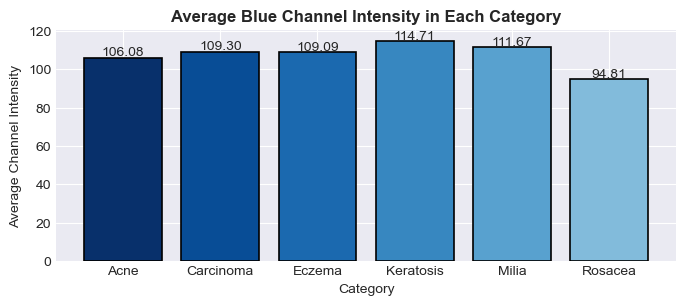

In [11]:
plot_channel_intensity_barplot(acne_b, carcinoma_b, eczema_b, keratosis_b, milia_b, rosacea_b, color='Blue')

<a id="how-do-the-average-green-channel-intensities-vary-across-categories"></a>
## How do the average green channel intensities vary across categories?

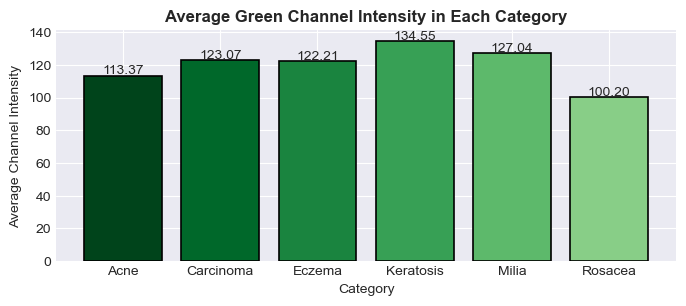

In [12]:
plot_channel_intensity_barplot(acne_g, carcinoma_g, eczema_g, keratosis_g, milia_g, rosacea_g, color='Green')

<a id="how-do-the-average-red-channel-intensities-vary-across-categories"></a>
## How do the average red channel intensities vary across categories?

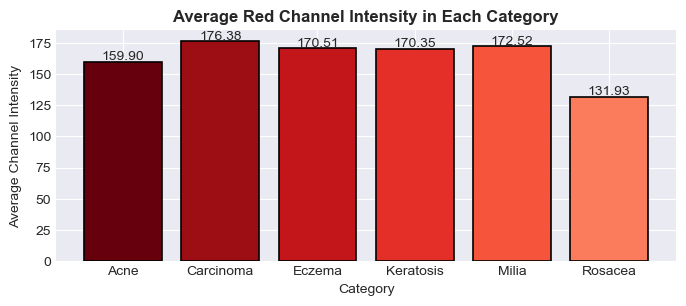

In [13]:
plot_channel_intensity_barplot(acne_r, carcinoma_r, eczema_r, keratosis_r, milia_r, rosacea_r, color='Red')

<a id="what-are-the-image-resolutions-in-each-category"></a>
## What are the image resolutions in each category?

In [14]:
def image_resolutions(subdirectory):
    """
    Obtains the pixel heights and pixel widths of all images in a given subdirectory
    Returns two lists:
        - pixel height: list containing pixel heights of all images in the subdirectory
        - pixel width: list containing pixel widths of all images in the subdirectory
    """
    image_list = os.listdir(subdirectory)

    pixel_heights = []
    pixel_widths = []
    for name in image_list:
        image = cv2.imread(subdirectory + "/" + name)
        pixel_heights.append(image.shape[0])
        pixel_widths.append(image.shape[1])

    return pixel_heights, pixel_widths

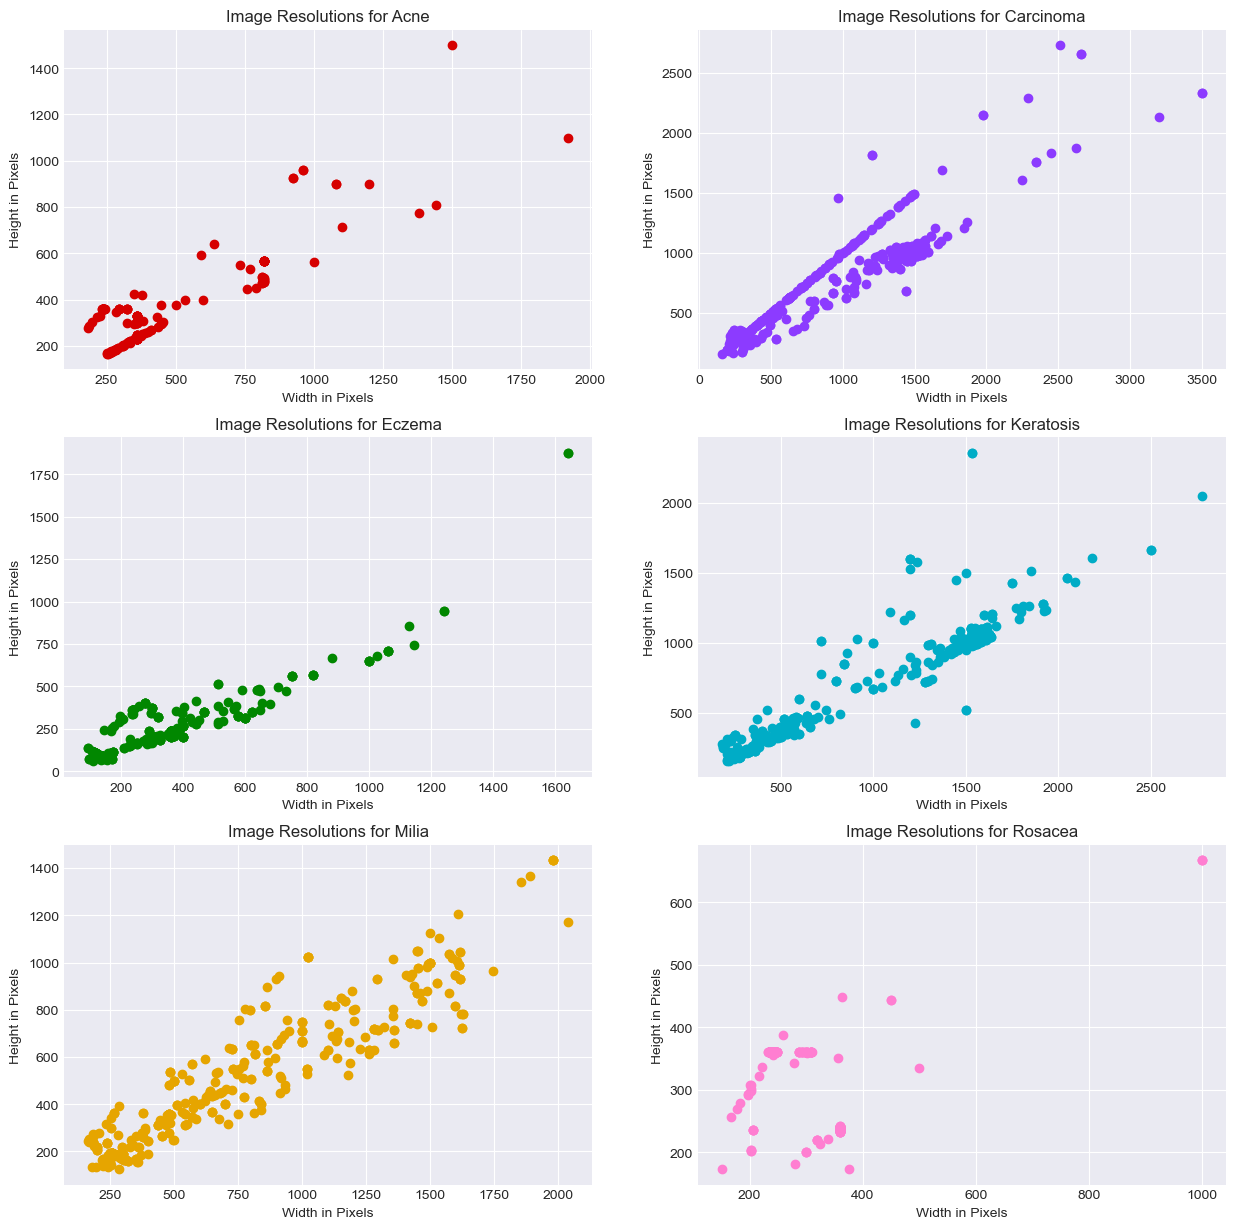

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
# Loop through all subdirectories and plot image resolutions
for n in range(6):
    ax = axes[n // 2, n % 2]

    heights, widths = image_resolutions(subdirectories[n])
    ax.scatter(widths, heights, color=cc.glasbey_dark[n])
    ax.set_title(f'Image Resolutions for {subdir_labels[n]}')
    ax.set_ylabel('Height in Pixels')
    ax.set_xlabel('Width in Pixels')

Many of the images in the plots above have varying resolutions, with Carcinoma images having the most amount of "square" images (images with the same height and width), indicated by the points following the trend $y = x$. Acne and Rosacea appear to have the least amount of variability in resolution, indicated by how many dots are visible. Since there are the same number of images in each category, there must be a lot of overlap.

Due to the nature of image data and the limited features we can analyze descriptively, this project will forgo an inferential analysis.

<a id="results"></a>
# Results
---

- There are 399 images in each category of skin conditions available: Acne, Carcinoma, Eczema, Keratosis, Milia, and Rosacea, totalling 2394 images.

- The average red channel intensity of images typically appears greater than the blue and green channel intensities. This is reasonable, since the images are largely depicting skin, which contains more red tones than others.

- The average blue channel intensities for an individual image in each category are:
    - Acne: 106.08
    - Carcinoma: 109.3
    - Eczema: 109.09
    - Keratosis: 114.71
    - Milia: 111.67
    - Rosacea: 94.81

- The average green channel intensities for an individual image in each category are:
    - Acne: 113.37
    - Carcinoma: 123.07
    - Eczema: 122.21
    - Keratosis: 134.55
    - Milia: 127.04
    - Rosacea: 100.2

- The average red channel intensities for an individual image in each category are:
    - Acne: 159.9
    - Carcinoma: 179.38
    - Eczema: 170.51
    - Keratosis: 170.35
    - Milia: 172.52
    - Rosacea: 131.93

- There is a lot of variable resolutions for images in each category; Rosacea has the smallest range of resolutions while Carcinoma has the largest.

<a id="external-resources"></a>
# External Resources
---
https://www.healthline.com/health/skin-disorders

https://github.com/henrhoi/image-classification/blob/master/feature_extraction_and_exploratory_data_analysis.ipynb

https://medium.com/@sehjadkhoja0/title-exploring-and-analyzing-image-data-with-python-79a7f72f4d2b

https://www.geeksforgeeks.org/python-os-listdir-method/

https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/

https://www.geeksforgeeks.org/python-opencv-cv2-imread-method/

https://scikit-image.org/docs/stable/user_guide/data_types.html